### Importing necessary library

In [374]:
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt

### Merging 12 months of sales data

In [375]:
# list out all the .csv file in the folder
List_Data = os.listdir('.\\Sales_Data')

# Create an empty dataframe to populate the merged files
all_sales_data = pd.DataFrame()

for file in List_Data:
    # Reads out the files as it goes through the file list and concatenate them to the empty dataframe created
    df = pd.read_csv('.\\Sales_Data\\' + file)
    all_sales_data = pd.concat([all_sales_data, df])

# Convert and save the final result as a csv file in the same directory
all_sales_data.to_csv("all_sales_data.csv", index=False)
    

### Loading the merged csv file

In [376]:
sales_data = pd.read_csv("all_sales_data.csv")

In [377]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Task 1: What is the month with the highest revenue and how much revenue was generated?

##### The dataset contains some rows with nan values and also some rows contains the names of their rspective columns, these must be handled before this task can be carried out, also a month and revenue column must be augmented.

In [378]:
# Dropping rows containing nan values 
sales_data = sales_data.dropna()

# Some rows contains names of their respective columns in it
dirty_rows = sales_data[sales_data["Order Date"].str[:2] == "Or"]
dirty_rows


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [379]:
# filtering by rows that does not contain "Or" in it
sales_data = sales_data[sales_data["Order Date"].str[:2] != "Or"]

# casting Quantityy orderd column to an integer
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype ('int32')

# casting price each column to float data type
sales_data["Price Each"] = sales_data["Price Each"].astype(float)

# adding a revenue column
sales_data["Revenue"] = sales_data['Quantity Ordered'] * sales_data["Price Each"]

In [380]:
# Creating month column
sales_data["Month"] = sales_data["Order Date"].str[:2]

# casting month column a an integer
sales_data["Month"] = sales_data["Month"].astype('int')

#Replace the month number with their respective names using map function()
month_name_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
sales_data["Month"] = sales_data["Month"].map(month_name_mapping) 

In [381]:
revenue_months = sales_data.groupby('Month')['Revenue'].sum()
revenue_months

Month
April        3390670.24
August       2244467.88
December     4613443.34
February     2202022.42
January      1822256.73
July         2647775.76
June         2577802.26
March        2807100.38
May          3152606.75
November     3199603.20
October      3736726.88
September    2097560.13
Name: Revenue, dtype: float64

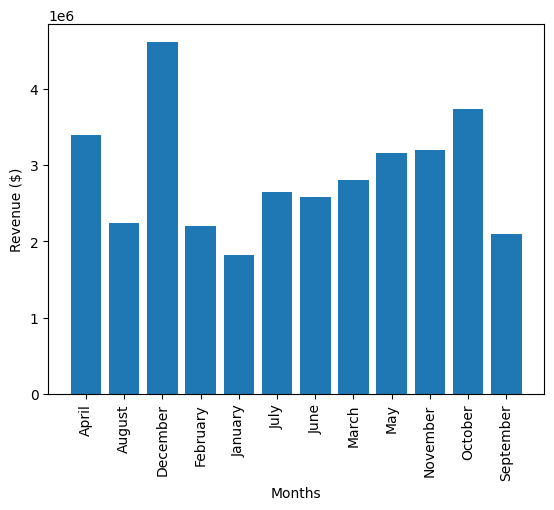

In [382]:
# months = [month for month, df in sales_data.groupby("Month")]
# plt.bar(months, sales_data.groupby("Month")["Revenue"].sum())
# plt.xticks(months, rotation = 'vertical')
# plt.ylabel('Revenue in USD')
# plt.xlabel('Months')
# plt.show()


                # OR


months = sales_data["Month"].sort_values().unique()
plt.bar(months, revenue_months)
plt.xticks(months, rotation = 'vertical')
# plt.xticks(months)
plt.ylabel('Revenue ($)')
plt.xlabel('Months')
plt.show()


### Task 2: What is the state with the highest revenue and how much revenue was generated?

##### A state column must be created in order to do this task

In [383]:
# Creating a state column
sales_data["State"] = sales_data["Purchase Address"].apply (lambda x: f"{x.split(",")[1]} ({x.split(",")[2].split(" ")[1]})")
# sales_data['Purchase Address'].str.split(",")[1]

sales_data['State']

0                 Dallas (TX)
2                 Boston (MA)
3            Los Angeles (CA)
4            Los Angeles (CA)
5            Los Angeles (CA)
                 ...         
186845       Los Angeles (CA)
186846     San Francisco (CA)
186847     San Francisco (CA)
186848     San Francisco (CA)
186849     San Francisco (CA)
Name: State, Length: 185950, dtype: object

In [384]:
revenue_state = sales_data.groupby("State")["Revenue"].sum()
revenue_state

State
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Revenue, dtype: float64

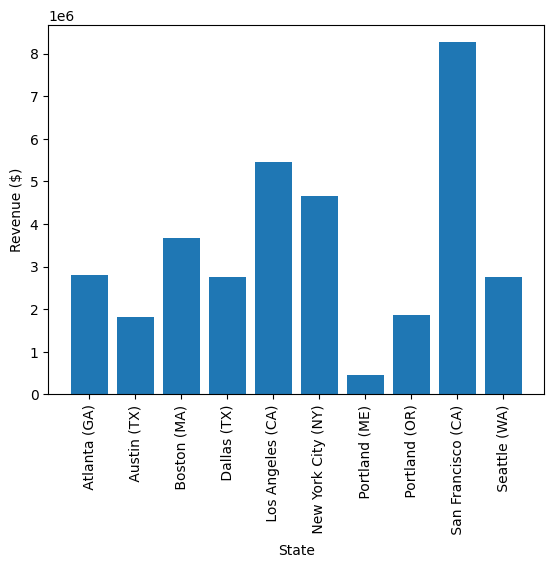

In [385]:
# state = [state for state, df in sales_data.groupby("State")]
# plt.bar(state, sales_data.groupby("State")["Revenue"].sum())
# plt.xticks(state, rotation = 'vertical')
# plt.ylabel('Revenue in USD')
# plt.xlabel('State')
# plt.show()


                # OR

state = sales_data["State"].sort_values().unique()
plt.bar(state, revenue_state)
plt.xticks(state, rotation = 'vertical')
plt.xticks(state)
plt.ylabel('Revenue ($)')
plt.xlabel('State')
plt.show()

### Task 3: When time should advertisement be displayed to maximize the likelihood of selling?

##### Recommendation: Advertisement should be done around 10am in the morning and 6pm in the evening

In [386]:
# Converting the "Order Date" column to a datetime format
sales_data["Order Date"] = pd.to_datetime(sales_data["Order Date"])

C:\Users\M. R. Nnamani\AppData\Local\Temp\ipykernel_2864\4176992860.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data["Order Date"] = pd.to_datetime(sales_data["Order Date"])


In [387]:
# Creating a column for hour and minute
sales_data['Hour'] = sales_data["Order Date"].dt.hour
sales_data['Minute']  = sales_data["Order Date"].dt.minute

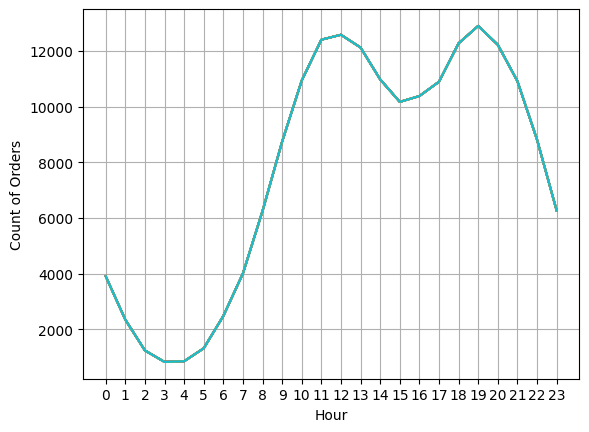

In [388]:
# hour = [hour for hour, df in sales_data.groupby("Hour")]
# plt.plot(hour, sales_data.groupby("Hour")["Revenue"].sum())
# plt.xticks(hour)
# plt.grid()
# plt.show()

                # OR


revenue_hour = sales_data.groupby("Hour").count()
hour = sales_data["Hour"].sort_values().unique()
plt.plot(hour, revenue_hour)
plt.xticks(hour)
plt.grid()
plt.ylabel('Count of Orders')
plt.xlabel('Hour')
plt.show()

### Task 4: which product generates the most revenue and which has the highest order rate

##### Macbook pro laptop generated the highest revenue although, it isn't among the top ten of products being ordered, this is due to it's high price, while AAA and AA batteries are the most ordered, but generated the least revenue, due to their low price

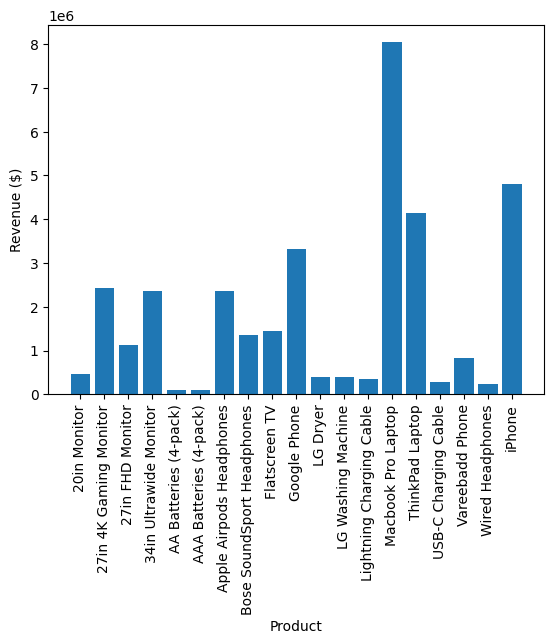

In [389]:
revenue_products = sales_data.groupby("Product")["Revenue"].sum()

products = [product for product, df in sales_data.groupby("Product")]

plt.bar(products, revenue_products)
plt.xticks(products, rotation="vertical")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.show()

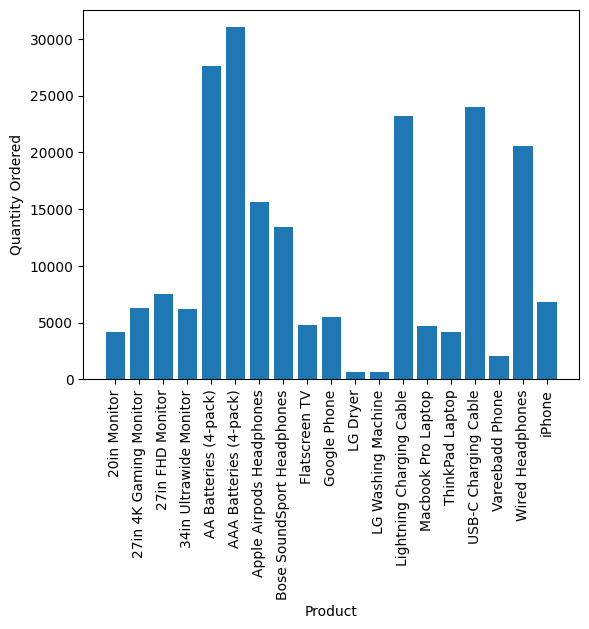

In [390]:
revenue_quantity = sales_data.groupby("Product")["Quantity Ordered"].sum()

# products_quantity = [products for products, df in sales_data.groupby("Quantity Ordered")]

products_quantity = sales_data["Product"].sort_values().unique()

plt.bar(products_quantity, revenue_quantity)
plt.xticks(products_quantity, rotation="vertical")
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.show()

##### Let's try to correlate the average price of each item and the quantity ordered to prove our hypothesis

##### We can see that the lower the price of the item the higher the quantity ordered although, this doesn't apply for every item like Macbook pro, LG Dryer and LG washing machine (these can be attributed to demand), but this correlation explains why AAA and AA batteries had the highs quantity ordered


C:\Users\M. R. Nnamani\AppData\Local\Temp\ipykernel_2864\3506237968.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products_quantity, rotation = "vertical")


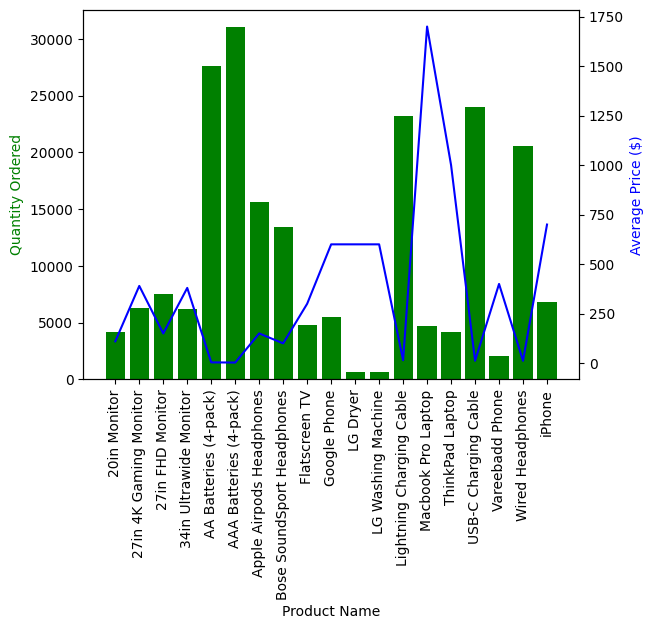

In [391]:
price_each = sales_data.groupby("Product")["Price Each"].mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products_quantity, revenue_quantity, color = "g")
ax2.plot(products_quantity, price_each, color = "b")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel("Average Price ($)", color="b")
ax1.set_xticklabels(products_quantity, rotation = "vertical")

plt.show()

### Task 5: Which products were mostly sold in group

##### In pair iPhone & Lightning Charging Cable were mostly ordered by customers

In [392]:
# sold_together = sales_data.groupby("Order ID").count()
# # 141236 141235
# sold_together = sold_together[sold_together["Product"] > 2 ]
# sold_together

# Getting products with the same order id
df = sales_data[sales_data["Order ID"].duplicated(keep=False)]

# Using transform() to concatenate the products
df["Grouped Products"] = df.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))

# dropping duplicated rows
df = df[["Order ID", "Grouped Products"]].drop_duplicates()
df

C:\Users\M. R. Nnamani\AppData\Local\Temp\ipykernel_2864\943961825.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped Products"] = df.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))


,Order ID,Grouped Products
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
186783,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
186791,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [393]:
from itertools import combinations
from collections import Counter

counter = Counter()

for row in df["Grouped Products"]:
    row_list = row.split(",")
    counter.update(Counter(combinations(row_list, 2)))

for key, value in counter.most_common():
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80
(' Lightning Charging Cable', ' Wired Headphones') 62
('Lightning Charging Cable', ' USB-C Charging Cable') 55
('Lightning Charging Cable', ' AA Batteries (4-pack)') 52
(' USB-C Charging Cable', ' Bose SoundSport Headphones') 51
('Lightning Charging Cable', ' Lightning Charging Cable') 51
('AA Batteries (4-pack)', ' Lightning Charging Cable') 51
('AAA Batteries (4-pack)', ' USB-C Charging Cable') 50
('AA Batteries (4-pack)', ' AAA Batteries (4-pack)') 48
('AAA Batteries (4-pack)', ' AAA Batteries (4-pack)') 48
(' Lightning Chargin